In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

import warnings


In [2]:
df = pd.read_csv('data/houes_cleaned_data.csv')

In [3]:
df.head()

,property_name,link,society,price,rate,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,noOfFloor,facing,agePossession,nearbyLocations,description,furnishDetails,features,area_sqft,Environment,Lifestyle,Connectivity,Safety,avg_rating,agePossession_years,agePossession_processed
0,5 Bedroom House for sale in Sector 70A Gurgaon,https://www.99acres.com/5-bhk-bedroom-independ...,bptp visionnaire,52500000.0,20115.0,(242 sq.m.) Plot Area,Plot area 290(242.48 sq.m.),5,4,3.0,Servant Room,"29b, Sector 70A Gurgaon, Gurgaon, Haryana",3,North-East,1,"['Good Earth City Center 2', 'Kunskapsskolan I...",Do you wish to buy an independent house in sec...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...",2604.8638,5.000000,4.000000,4.000000,4.000000,4.250000,1.0,1.0
1,5 Bedroom House for sale in Sector 21A Faridabad,https://www.99acres.com/5-bhk-bedroom-independ...,unknown,57000000.0,105751.0,(50 sq.m.) Plot Area,Plot area 539(50.07 sq.m.),5,4,2.0,"Store Room,Pooja Room,Servant Room","Sector 21A Faridabad, Gurgaon, Haryana",2,Missing,10,NaN,"Hi, we have an independent house/villa availab...","['1 Water Purifier', '5 Fan', '1 Exhaust Fan',...","['Private Garden / Terrace', 'Park', 'Visitor ...",538.1950,4.274531,4.340684,4.535832,4.228225,4.344818,10.0,10.0
2,10 Bedroom House for sale in Sushant Lok Phase 1,https://www.99acres.com/10-bhk-bedroom-indepen...,unknown,21000000.0,38251.0,(51 sq.m.) Plot Area,Plot area 61(51 sq.m.),10,10,3.0,Servant Room,"Sushant Lok Phase 1, Gurgaon, Haryana",5,West,1,"['Sector 42-43 metro station', 'Huda city cent...","Monthly rental income is rs1,40,000/- Best opt...","['10 Bed', '3 Fan', '10 Geyser', '2 Light', 'N...","['Maintenance Staff', 'Water Storage', 'Visito...",548.9589,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0
3,21 Bedroom House for sale in Sector 54 Gurgaon,https://www.99acres.com/21-bhk-bedroom-indepen...,unknown,50000000.0,43066.0,(108 sq.m.) Plot Area,Plot area 129(107.86 sq.m.),21,21,3.0,Servant Room,"Sector 54 Gurgaon, Gurgaon, Haryana",5,North,5,"['Sector 53-54 metro station', 'Sector 54 chow...","129 sq yd plot size. 5 floors built up , fully...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...",1162.5012,4.000000,5.000000,4.000000,4.000000,4.250000,5.0,5.0
4,12 Bedroom House for sale in Sushant Lok Phase 1,https://www.99acres.com/12-bhk-bedroom-indepen...,unknown,30000000.0,53763.0,(52 sq.m.) Plot Area,Plot area 62(51.84 sq.m.),12,12,3.0,Others,"1228, Sushant Lok Phase 1, Gurgaon, Haryana",5,West,Within 6 months,"['Sector 42-43 metro station', 'Huda city cent...",Best for investment purpose. Fully furnished b...,"['1 Water Purifier', '1 Fridge', '12 Fan', '1 ...","['Maintenance Staff', 'Water Storage', 'Visito...",559.7228,5.000000,5.000000,5.000000,5.000000,5.000000,0.0,0.5


In [4]:
df.columns

Index(['property_name', 'link', 'society', 'price', 'rate', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom',
       'address', 'noOfFloor', 'facing', 'agePossession', 'nearbyLocations',
       'description', 'furnishDetails', 'features', 'area_sqft', 'Environment',
       'Lifestyle', 'Connectivity', 'Safety', 'avg_rating',
       'agePossession_years', 'agePossession_processed'],
      dtype='object')

In [7]:
df[['area','area_sqft']] #Size of the property (numeric value)

,area,area_sqft
0,(242 sq.m.) Plot Area,2604.8638
1,(50 sq.m.) Plot Area,538.1950
2,(51 sq.m.) Plot Area,548.9589
3,(108 sq.m.) Plot Area,1162.5012
4,(52 sq.m.) Plot Area,559.7228
...,...,...
1039,(167 sq.m.) Plot Area,1797.5713
1040,(125 sq.m.) Plot Area,1345.4875
1041,(125 sq.m.) Plot Area,1345.4875
1042,(91 sq.m.) Plot Area,979.5149


In [8]:
df['rate'].head() #Price per unit area (like per sq. ft)

0     20115.0
1    105751.0
2     38251.0
3     43066.0
4     53763.0
Name: rate, dtype: float64

In [9]:
selected_columns = ['facing','rate','area_sqft','bedRoom','bathroom','balcony','noOfFloor',
                    'agePossession_processed','avg_rating','price']

df[selected_columns].head()


,facing,rate,area_sqft,bedRoom,bathroom,balcony,noOfFloor,agePossession_processed,avg_rating,price
0,North-East,20115.0,2604.8638,5,4,3.0,3,1.0,4.250000,52500000.0
1,Missing,105751.0,538.1950,5,4,2.0,2,10.0,4.344818,57000000.0
2,West,38251.0,548.9589,10,10,3.0,5,1.0,5.000000,21000000.0
3,North,43066.0,1162.5012,21,21,3.0,5,5.0,4.250000,50000000.0
4,West,53763.0,559.7228,12,12,3.0,5,0.5,5.000000,30000000.0


In [10]:
df['facing'].unique()

array(['North-East', 'Missing', 'West', 'North', 'East', 'South-West',
       'South', 'South-East', 'North-West'], dtype=object)

In [11]:
features_columns = ['facing','rate','area_sqft','bedRoom','bathroom','balcony','noOfFloor',
                    'agePossession_processed','avg_rating']

target ='price'

X = df[features_columns]
y = df[target]

In [12]:
X.shape

(1044, 9)

In [13]:
y.shape

(1044,)

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [15]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [16]:
numeric_transform = StandardScaler()
oh_transform = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transform,cat_features),
        ("StandardScaler", numeric_transform,num_features)
    ]
)

In [17]:
X = preprocessor.fit_transform(X)

In [18]:
X.shape

(1044, 17)

In [21]:

x_train,x_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [22]:
x_train.shape, y_train.shape

((835, 17), (835,))

In [28]:
def evaluate_model(true, prediction):
    mae = mean_absolute_error(true, prediction)
    mse = mean_squared_error(true,prediction)
    rmse = np.sqrt(mean_squared_error(true,prediction))
    r2_squre = r2_score(true,prediction)
    return mae, rmse , r2_squre

In [24]:
models ={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoostRegressor": CatBoostRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor()
}

In [29]:
models_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae , model_train_rmse, model_train_r2_score = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2_score = evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2_score))
    r2_list.append(model_test_r2_score)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 34510182.6863
- Mean Absolute Error: 24494975.8523
- R2 Score: 0.3944
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 37392100.3021
- Mean Absolute Error: 26875847.0538
- R2 Score: 0.3048


Lasso
Model performance for Training set
- Root Mean Squared Error: 34510182.6863
- Mean Absolute Error: 24494975.3231
- R2 Score: 0.3944
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 37392099.1066
- Mean Absolute Error: 26875845.1990
- R2 Score: 0.3048


Ridge
Model performance for Training set
- Root Mean Squared Error: 34510848.8366
- Mean Absolute Error: 24490703.7959
- R2 Score: 0.3944
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 37382486.6224
- Mean Absolute Error: 26845543.2412
- R2 Score: 0.3052




C:\Users\suman\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.520e+16, tolerance: 1.642e+14
  model = cd_fast.enet_coordinate_descent(


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 27855098.2132
- Mean Absolute Error: 19084072.7544
- R2 Score: 0.6055
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 36743396.3385
- Mean Absolute Error: 24515844.7473
- R2 Score: 0.3287


Decision Tree Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 22102732.5564
- Mean Absolute Error: 8480554.9240
- R2 Score: 0.7571


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 5938146.2500
- Mean Absolute Error: 2398490.8765
- R2 Score: 0.9821
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 17668743.6872
- Mean Absolute Error: 6598364.5761
- R2 Score: 0.8448


XGBRegressor
Model performance for Training set
- Root Me

In [30]:
pd.DataFrame(list(zip(models_list,r2_list)), columns=['Model Name', "R2_score"]).sort_values(by=['R2_score'], ascending=False)

,Model Name,R2_score
7,CatBoostRegressor,0.868141
5,Random Forest Regressor,0.844781
6,XGBRegressor,0.829627
4,Decision Tree Regressor,0.757101
8,AdaBoostRegressor,0.650774
3,K-Neighbors Regressor,0.328736
2,Ridge,0.305182
1,Lasso,0.304825
0,Linear Regression,0.304825


In [31]:
cat_model = CatBoostRegressor()
cat_model.fit(x_train,y_train)
y_pred = cat_model.predict(x_test)
score = r2_score(y_test,y_pred)

print("accuracy ",score)

Learning rate set to 0.039793
0:	learn: 43192963.5820859	total: 3.69ms	remaining: 3.69s
1:	learn: 42150301.7221926	total: 7.74ms	remaining: 3.86s
2:	learn: 41087770.8057498	total: 10.5ms	remaining: 3.49s
3:	learn: 40270158.8277479	total: 13ms	remaining: 3.23s
4:	learn: 39310934.7251715	total: 14.9ms	remaining: 2.96s
5:	learn: 38464089.4790882	total: 16.9ms	remaining: 2.81s
6:	learn: 37610732.8032429	total: 19.3ms	remaining: 2.73s
7:	learn: 36830598.1163297	total: 21.3ms	remaining: 2.65s
8:	learn: 36001471.9792256	total: 23.6ms	remaining: 2.59s
9:	learn: 35281924.9714467	total: 25.7ms	remaining: 2.55s
10:	learn: 34541988.3750572	total: 27.7ms	remaining: 2.49s
11:	learn: 33936799.4961535	total: 30.2ms	remaining: 2.49s
12:	learn: 33314414.1067855	total: 32.1ms	remaining: 2.44s
13:	learn: 32691464.0069468	total: 34ms	remaining: 2.39s
14:	learn: 32027587.4955115	total: 38.6ms	remaining: 2.53s
15:	learn: 31456767.0784177	total: 40.6ms	remaining: 2.5s
16:	learn: 30822347.4991646	total: 44.3ms

Text(0, 0.5, 'Predicted')

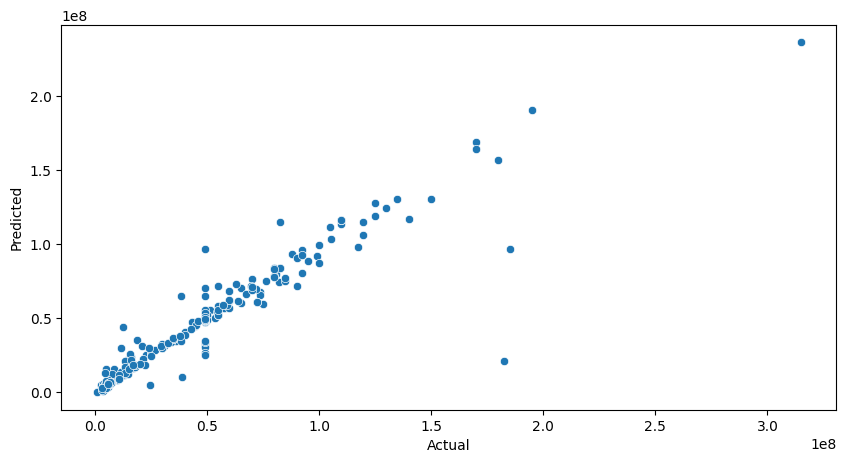

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test,y=y_pred )
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='price'>

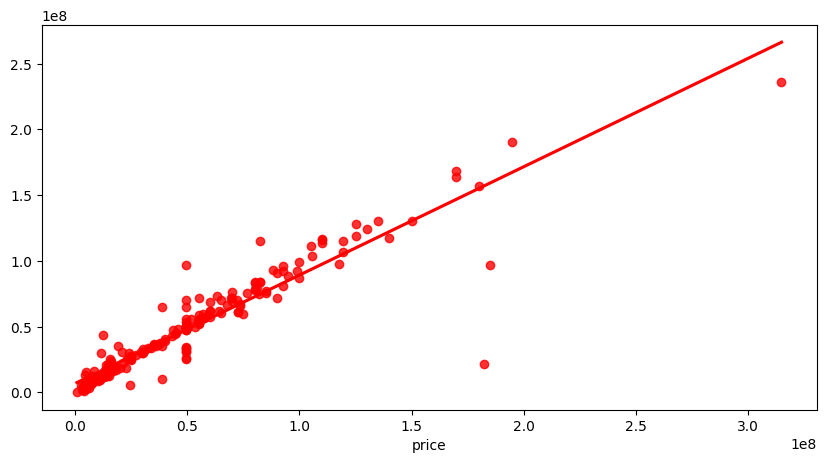

In [37]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

In [51]:
pred_dff = pd.DataFrame({'Actual Values':[f"{int(round(val)):,}" for val in y_test], "predicted values":[f"{int(round(val)):,}" for val in y_pred], "Difference ": [f"{int(round(val)):,}" for val in abs(y_test - y_pred)]})

pred_dff

,Actual Values,predicted values,Difference
0,"14,500,000","19,347,795","4,847,795"
1,"11,600,000","13,187,151","1,587,151"
2,"17,000,000","16,394,485","605,515"
3,"82,500,000","83,679,779","1,179,779"
4,"15,000,000","14,484,844","515,156"
...,...,...,...
204,"185,000,000","97,110,860","87,889,140"
205,"119,500,000","106,425,463","13,074,537"
206,"35,000,000","36,530,344","1,530,344"
207,"11,000,000","9,296,558","1,703,442"


In [52]:
pred_dff.tail()

,Actual Values,predicted values,Difference
204,"185,000,000","97,110,860","87,889,140"
205,"119,500,000","106,425,463","13,074,537"
206,"35,000,000","36,530,344","1,530,344"
207,"11,000,000","9,296,558","1,703,442"
208,"38,000,000","37,922,647","77,353"
